In [1]:
import cv2
import numpy as np
from matplotlib import pyplot as plt
from sklearn.cluster import DBSCAN

%matplotlib inline 

In [2]:
import os

charts_path = "Data/chart/categorical1/"
output_path = "Output/discrete/"

list_chart = [i for i in os.listdir(charts_path) if i not in ['no_legend', '.DS_Store', 'useless']]

In [3]:
def find_most_frequent_color(img):
    data = np.reshape(img, (-1,3))
    dict_count = {}

    for i in range(data.shape[0]):
        if str(data[i,:].tolist()) not in dict_count.keys():
            dict_count[str(data[i,:].tolist())] = 1
        else:
            dict_count[str(data[i,:].tolist())] += 1
            
    color_str = sorted(dict_count.items(), key=lambda x:x[1], reverse=1)[0][0]
    return np.fromstring(color_str[1:-1], dtype=int, sep=',')



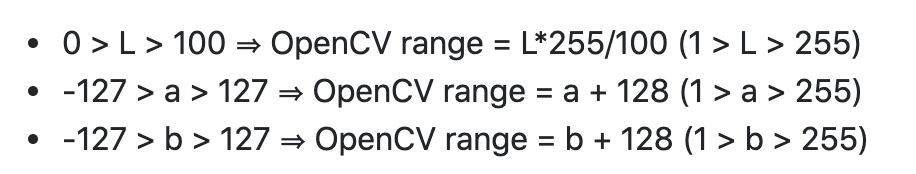

In [4]:
def mask_img(img, mfc, T_bg=5, T_gray=5):
    
#     mask = np.ones((img.shape[0], img.shape[1]), dtype='uint8')

    for i in range(img.shape[0]):
        for j in range(img.shape[1]):
        # mask for background
            if np.max(abs(img[i,j,:]-mfc)) <= T_bg:
                img[i,j] = [255,128,128]
            # mask for gray
            elif np.max(abs(img[i,j,1:]-np.array([128, 128]))) <= T_gray:
                img[i,j] = [255,128,128]
    
    return img

In [5]:
# mask_lab = generate_mask(img_lab, mfc, T_bg=5, T_gray=5)

In [6]:
# masked_img_lab = cv2.bitwise_and(img_lab,img_lab,mask=mask_lab)

In [7]:
def color_clustering(img, eps=5, min_samples=20):
    data = []
    for i in range(img.shape[0]):
        for j in range(img.shape[1]):
            data.append(np.concatenate((img[i,j,:], np.array([i,j]))))
            
    clustering = DBSCAN(eps=eps, min_samples=min_samples).fit(np.array(data)) 
    
    color_dict = {}
    
    # find colors of pixels in each cluster
    for p in range(max(clustering.labels_)+1):
        color_dict[p] = img.reshape(-1,3)[clustering.labels_==p]
        
    # find most frequent color in each cluster
    list_color = []
    for q in color_dict.values():
        mfc_ = find_most_frequent_color(q)
        # remove masked colors
        if mfc_.tolist() != [255, 128, 128]:
            list_color.append(mfc_)
    
    return list_color

In [8]:
def plot_color(colors):
    color_matrices = []
    for i in colors:
        color_matrices.append(np.full((20, 20, 3), i.tolist(), dtype='uint8'))
        
    img = np.concatenate(color_matrices, axis=1)
    plt.imshow(cv2.cvtColor(img, cv2.COLOR_LAB2RGB))
    plt.axis('off')
    plt.show()   

In [9]:
def save_color(colors, output_path, chart_name):
    color_matrices = []
    for i in colors:
        color_matrices.append(np.full((80, 80, 3), i.tolist(), dtype='uint8'))
        
    img = np.concatenate(color_matrices, axis=1)
    cv2.imwrite(output_path+chart_name, cv2.cvtColor(img, cv2.COLOR_LAB2BGR))
#     plt.imshow(cv2.cvtColor(img, cv2.COLOR_LAB2RGB))
#     plt.axis('off')
#     plt.show()   

In [10]:
def get_result(charts_path, output_path, chart_name):
    img_bgr = cv2.imread(charts_path+chart_name, cv2.IMREAD_COLOR) 
    img_lab = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2LAB)
    mfc = find_most_frequent_color(img_lab)
    masked_img_lab = mask_img(img_lab, mfc)
    colors = color_clustering(masked_img_lab, eps=5, min_samples=10)
    
    save_color(colors, output_path, chart_name)
    
    return [list(i) for i in colors]

In [11]:
get_result(charts_path, output_path, list_chart[0])

[[200, 104, 135], [216, 134, 189], [165, 183, 159]]

In [12]:
list_colors = []

for i in list_chart:
    c = get_result(charts_path, output_path, i)
    n = i.split(".")[0][1:]
    
    list_colors.append({n: c})

In [13]:
list_colors

[{'621': [[200, 104, 135], [216, 134, 189], [165, 183, 159]]},
 {'423': [[119, 129, 93], [142, 129, 87], [126, 167, 177], [150, 173, 185]]},
 {'344': [[252, 118, 161],
   [66, 164, 146],
   [154, 128, 85],
   [252, 118, 161],
   [66, 164, 146],
   [229, 130, 166],
   [49, 148, 137],
   [252, 118, 161],
   [66, 164, 146],
   [252, 118, 161],
   [66, 164, 146],
   [154, 128, 85],
   [154, 128, 85],
   [124, 137, 82],
   [167, 159, 186],
   [172, 97, 179]]},
 {'595': [[123, 125, 88],
   [171, 171, 200],
   [148, 74, 177],
   [119, 193, 172],
   [131, 163, 90]]},
 {'581': [[239, 117, 140],
   [227, 108, 149],
   [239, 120, 128],
   [196, 101, 129],
   [222, 113, 128],
   [222, 113, 128],
   [205, 105, 129],
   [174, 101, 112],
   [209, 110, 118],
   [209, 110, 118],
   [160, 113, 101],
   [143, 114, 96],
   [191, 115, 109],
   [191, 115, 109],
   [223, 120, 118]]},
 {'24': [[110, 131, 85],
   [193, 128, 105],
   [165, 175, 199],
   [205, 145, 174],
   [88, 138, 82],
   [186, 129, 102],
   